# Imports

In [92]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path

In [93]:
data_dir = Path('data')
figures_dir = Path('figures')
output_dir = Path('outputs')

# Load Data

In [94]:
# Load data

df_anillo_1 = pd.read_csv(data_dir / 'anillo1.csv')
df_anillo_2 = pd.read_csv(data_dir / 'anillo2.csv') 

data = [df_anillo_1, df_anillo_2]

In [95]:
print(df_anillo_1.head(), "\n")
print(df_anillo_2.head(), "\n")

   Voltage [V]  Diametro [mm]  Error Diametro [mm]
0         4810           51.1                  0.9
1         4500           52.4                  1.3
2         4310           55.1                  1.3
3         4100           56.6                  1.6
4         3910           56.4                  1.3 

   Voltage [V]  Diametro [mm]  Error Diametro [mm]
0         4810           91.5                  1.5
1         4500           90.2                  1.2
2         4310           93.4                  1.3
3         4100           96.0                  0.9
4         3910           98.0                  2.0 



# Theory

## De Broglie Wavelength

An electron with charge $e$ accelerated through a potential difference $V$ will have a kinetic energy $K = eV$. The de Broglie wavelength of the electron is given by $\lambda = \frac{h}{p}$, where $p$ is the momentum of the electron and $h$ is the Planck constant.

The momentum of the electron is given by $p = \sqrt{2mK}$, where $m$ is the mass of the electron.

Substituting $K = eV$ into the expression for $p$, we get $p = \sqrt{2meV}$.

Substituting $p$ into the expression for $\lambda$, we get: 
$$
\lambda = \frac{h}{\sqrt{2meV}}
$$

# Data manipulation

In [96]:
def DeBroglie_wavelength(V, m=9.11e-31, e=1.602e-19, h=6.62e-34):
	return h / np.sqrt(2 * m * e * V)

def DeBroglie_wavelength_error(V, V_error, m=9.11e-31, e=1.602e-19, h=6.62e-34):
	return DeBroglie_wavelength(V, m, e, h) * (V_error / V)

In [97]:
def volatage_error(V):
	return 0.02 * V + 10

In [98]:
for df in data:
	df['Voltage Error [V]'] = volatage_error(df['Voltage [V]'])
	df['lambda [m]'] = DeBroglie_wavelength(df['Voltage [V]'])
	df['lambda error [m]'] = DeBroglie_wavelength_error(df['Voltage [V]'], df['Voltage Error [V]'])

In [99]:
# Alex measured the radius directly. From index 7, diameter = 2 * radius
def radius_to_diam(df, start_index):
	# From index start_index, radius = diameter / 2
	df.loc[start_index:, 'Diametro [mm]'] = 2 * df.loc[start_index:, 'Diametro [mm]'] 


# Only if not already done
# Check if df[start_index] < df[0]
start_index = 7
for df in data:
	if df.loc[start_index, 'Diametro [mm]'] < df.loc[0, 'Diametro [mm]']:
		radius_to_diam(df, start_index)

In [100]:
def diam_to_radius(df):
	df['Radio [mm]'] = df['Diametro [mm]'] / 2

def radius_to_meters(df):
	df['Radio [m]'] = df['Radio [mm]'] / 1000

def diam_to_meters(df):
	df['Diametro [m]'] = df['Diametro [mm]'] / 1000

def error_radio(df):
	df['Error Radio [m]'] = df['Error Diametro [mm]'] / 1000

for df in data:
	diam_to_radius(df)
	radius_to_meters(df)
	diam_to_meters(df)
	error_radio(df)

In [101]:
df_anillo_1

,Voltage [V],Diametro [mm],Error Diametro [mm],Voltage Error [V],lambda [m],lambda error [m],Radio [mm],Radio [m],Diametro [m],Error Radio [m]
0,4810,51.1,0.9,106.2,1.766770e-11,3.900852e-13,25.55,0.02555,0.0511,0.0009
1,4500,52.4,1.3,100.0,1.826612e-11,4.059138e-13,26.20,0.02620,0.0524,0.0013
2,4310,55.1,1.3,96.2,1.866439e-11,4.165928e-13,27.55,0.02755,0.0551,0.0013
3,4100,56.6,1.6,92.0,1.913642e-11,4.294025e-13,28.30,0.02830,0.0566,0.0016
4,3910,56.4,1.3,88.2,1.959585e-11,4.420343e-13,28.20,0.02820,0.0564,0.0013
5,3690,63.0,2.0,83.8,2.017155e-11,4.580965e-13,31.50,0.03150,0.0630,0.0020
6,3480,63.0,2.1,79.6,2.077126e-11,4.751128e-13,31.50,0.03150,0.0630,0.0021
7,3300,63.2,1.2,76.0,2.133023e-11,4.912417e-13,31.60,0.03160,0.0632,0.0012
8,3100,63.0,0.6,72.0,2.200755e-11,5.111431e-13,31.50,0.03150,0.0630,0.0006
9,2900,68.2,0.6,68.0,2.275378e-11,5.335369e-13,34.10,0.03410,0.0682,0.0006


# Plotting

## Radius vs WaveLength

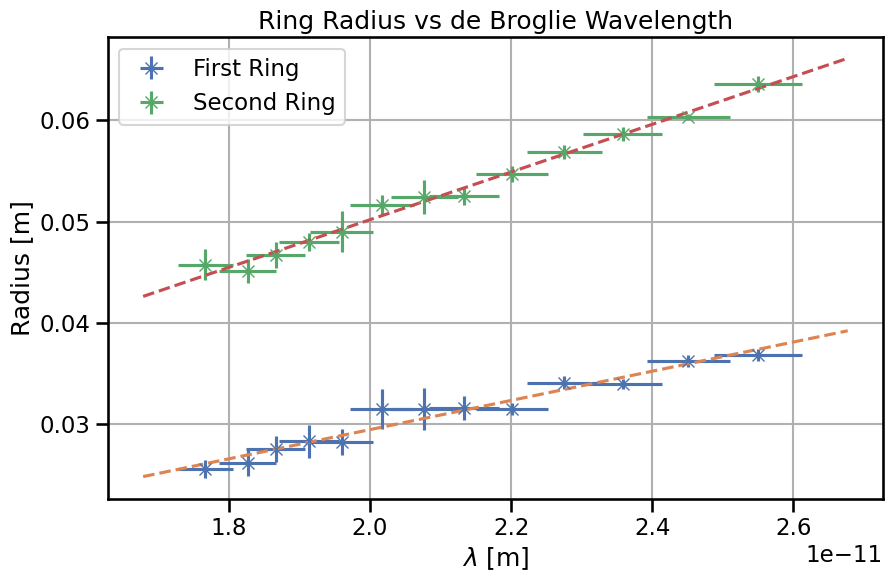

In [112]:
# Regression lines
from scipy.stats import linregress

results_1 = linregress(df_anillo_1['lambda [m]'], df_anillo_1['Radio [m]'])
results_2 = linregress(df_anillo_2['lambda [m]'], df_anillo_2['Radio [m]'])

x = np.linspace(df_anillo_1['lambda [m]'].min()*0.95, df_anillo_1['lambda [m]'].max()*1.05, 100)

plt.figure(figsize=(10, 6))

sns.set_style()
sns.set_context('talk')
sns.set_palette('deep')

plt.errorbar(df_anillo_1['lambda [m]'], df_anillo_1['Radio [m]'], yerr=df_anillo_1['Error Radio [m]'], xerr=df_anillo_1['lambda error [m]'], fmt='x', label='First Ring')
plt.plot(x, results_1.intercept + results_1.slope * x, '--')

plt.errorbar(df_anillo_2['lambda [m]'], df_anillo_2['Radio [m]'], yerr=df_anillo_2['Error Radio [m]'], xerr=df_anillo_2['lambda error [m]'], fmt='x', label='Second Ring')
plt.plot(x, results_2.intercept + results_2.slope * x, '--')


# plt.plot(df_anillo_1['lambda [m]'], df_anillo_1['Radio [m]'], 'x', label='Anillo 1')
# plt.plot(df_anillo_2['lambda [m]'], df_anillo_2['Radio [m]'], 'x', label='Anillo 2')

plt.title('Ring Radius vs de Broglie Wavelength')
plt.xlabel(r'$\lambda$ [m]')
plt.ylabel('Radius [m]')

plt.legend()
plt.grid()

plt.savefig(figures_dir / 'radio_vs_lambda.pdf')

In [106]:
# Export results to df
results = pd.DataFrame({
	'Anillo 1': [results_1.slope, results_1.intercept, results_1.stderr, results_1.intercept_stderr, results_1.rvalue**2, results_1.pvalue],
	'Anillo 2': [results_2.slope, results_2.intercept, results_2.stderr, results_2.intercept_stderr, results_2.rvalue**2, results_2.pvalue],
}, index=['Pendiente', 'Ordenada en el origen', 'Error Pendiente', 'Error Ordenada en el origen', 'R2', 'p-valor'])

In [107]:
results.to_csv(output_dir / 'ajustes.csv')

## Radius vs Voltage

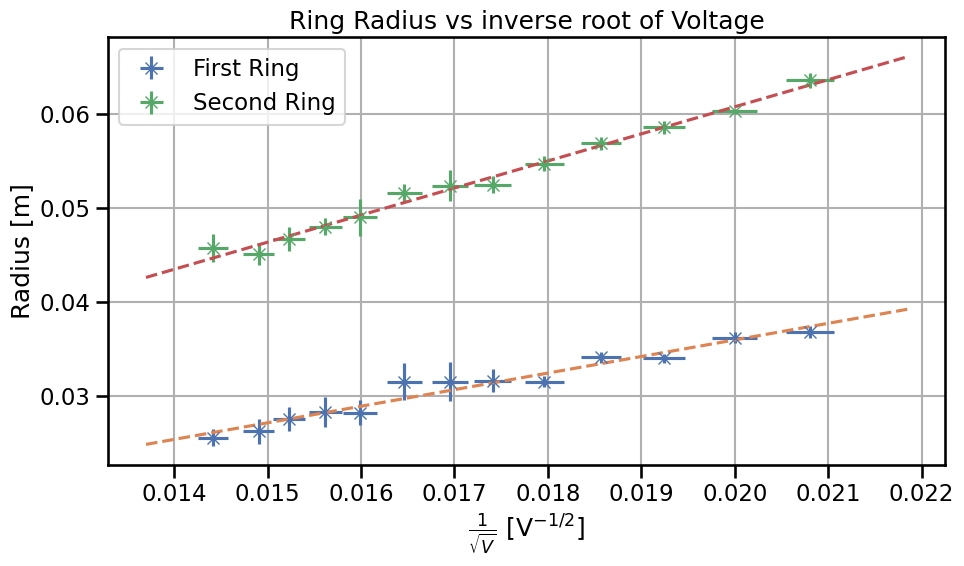

In [116]:
# Regression lines
from scipy.stats import linregress

x_exp_1 = df_anillo_1['Voltage [V]']**(-1/2)
x_exp_2 = df_anillo_2['Voltage [V]']**(-1/2)

y_exp_1 = df_anillo_1['Radio [m]']
y_exp_2 = df_anillo_2['Radio [m]']


results_V_1 = linregress(x_exp_1, y_exp_1)
results_V_2 = linregress(x_exp_2, y_exp_2)

x = np.linspace(x_exp_1.min()*0.95, x_exp_1.max()*1.05, 100)

plt.figure(figsize=(10, 6))

sns.set_style()
sns.set_context('talk')
sns.set_palette('deep')

plt.errorbar(x_exp_1, y_exp_1, yerr=df_anillo_1['Error Radio [m]'], xerr=0.5 * df_anillo_1['Voltage Error [V]'] / df_anillo_1['Voltage [V]']**1.5, fmt='x', label='First Ring')
plt.plot(x, results_V_1.intercept + results_V_1.slope * x, '--')

plt.errorbar(x_exp_2, y_exp_2, yerr=df_anillo_2['Error Radio [m]'], xerr=0.5 * df_anillo_2['Voltage Error [V]'] / df_anillo_2['Voltage [V]']**1.5, fmt='x', label='Second Ring')
plt.plot(x, results_V_2.intercept + results_V_2.slope * x, '--')


# plt.plot(df_anillo_1['lambda [m]'], df_anillo_1['Radio [m]'], 'x', label='Anillo 1')
# plt.plot(df_anillo_2['lambda [m]'], df_anillo_2['Radio [m]'], 'x', label='Anillo 2')

plt.title('Ring Radius vs inverse root of Voltage')
plt.xlabel(r'$\frac{1}{\sqrt{V}}$ [V$^{-1/2}$]')
plt.ylabel('Radius [m]')

plt.legend()
plt.grid()
plt.tight_layout()

plt.savefig(figures_dir / 'radio_vs_inv_V.pdf')

In [115]:
results_V = pd.DataFrame({
	'Anillo 1': [results_V_1.slope, results_V_1.intercept, results_V_1.stderr, results_V_1.intercept_stderr, results_V_1.rvalue**2, results_V_1.pvalue],
	'Anillo 2': [results_V_2.slope, results_V_2.intercept, results_V_2.stderr, results_V_2.intercept_stderr, results_V_2.rvalue**2, results_V_2.pvalue],
}, index=['Pendiente', 'Ordenada en el origen', 'Error Pendiente', 'Error Ordenada en el origen', 'R2', 'p-valor'])

results_V.to_csv(output_dir / 'ajustes_V.csv')